# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction. A brief description of the attributes is given here below: 
    
<br> Preg: Number of times pregnant
<br> Plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
<br> Pres: Diastolic blood pressure (mm Hg)
<br> skin: Triceps skin fold thickness (mm)
<br> test: 2-Hour serum insulin (mu U/ml)
<br> mass: Body mass index (weight in kg/(height in m)^2)
<br> pedi: Diabetes pedigree function
<br> age: Age (years)
<br> class: Class variable (0 or 1)

</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [73]:
#Import all the necessary modules
import pandas as pd
import numpy as np
##from sklearn import 

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [74]:
pima_df = pd.read_csv('pima-indians-diabetes.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file.

# Q2. Print 10 samples from the dataset

In [75]:
pima_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [76]:
#datatypes
print(pima_df.dtypes)
#shape
print('Shape of the dataframe :',pima_df.shape)

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object
Shape of the dataframe : (768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [62]:
#Take only those the colunms to which 0 has to be replaced
pima_df[pima_df == 0].count()

Preg     111
Plas       5
Pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class    500
dtype: int64

In [77]:
#Preg and class should not be replaced by zero
#fetching the colunms to be replaced with zero into another dataframe
pima_df1=pima_df.iloc[:,1:8]
pima_df1[pima_df1 == 0].count()

Plas      5
Pres     35
skin    227
test    374
mass     11
pedi      0
age       0
dtype: int64

In [80]:
#replace the 0 with nan
pima_df1.replace(0,np.nan,inplace=True)
#fill the nan with the median of each colunm
pima_df1 = pima_df1.fillna(pima_df1.median())
#check for the count now
pima_df1[pima_df1 == 0].count()

Plas    0
Pres    0
skin    0
test    0
mass    0
pedi    0
age     0
dtype: int64

In [83]:
pima_df1['Preg']=pima_df['Preg']
pima_df1['Class']=pima_df['class']
pima_df1

,Plas,Pres,skin,test,mass,pedi,age,Preg,Class
0,148.0,72.0,35.0,125.0,33.6,0.627,50,6,1
1,85.0,66.0,29.0,125.0,26.6,0.351,31,1,0
2,183.0,64.0,29.0,125.0,23.3,0.672,32,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33,0,1
5,116.0,74.0,29.0,125.0,25.6,0.201,30,5,0
6,78.0,50.0,32.0,88.0,31.0,0.248,26,3,1
7,115.0,72.0,29.0,125.0,35.3,0.134,29,10,0
8,197.0,70.0,45.0,543.0,30.5,0.158,53,2,1
9,125.0,96.0,29.0,125.0,32.3,0.232,54,8,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [86]:
pima_df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
test,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
mass,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

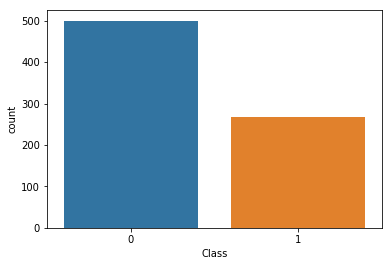

In [88]:
import seaborn as sns
sns.countplot(x='Class',data=pima_df1)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

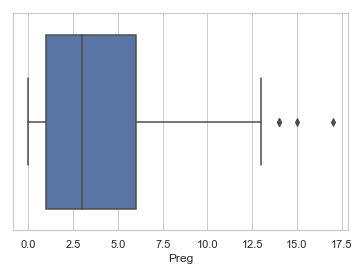

In [132]:
sns.set(style='whitegrid')
sns.boxplot(x='Preg',data=pima_df1)
#observation median is around 2.6
#outliers are present 

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


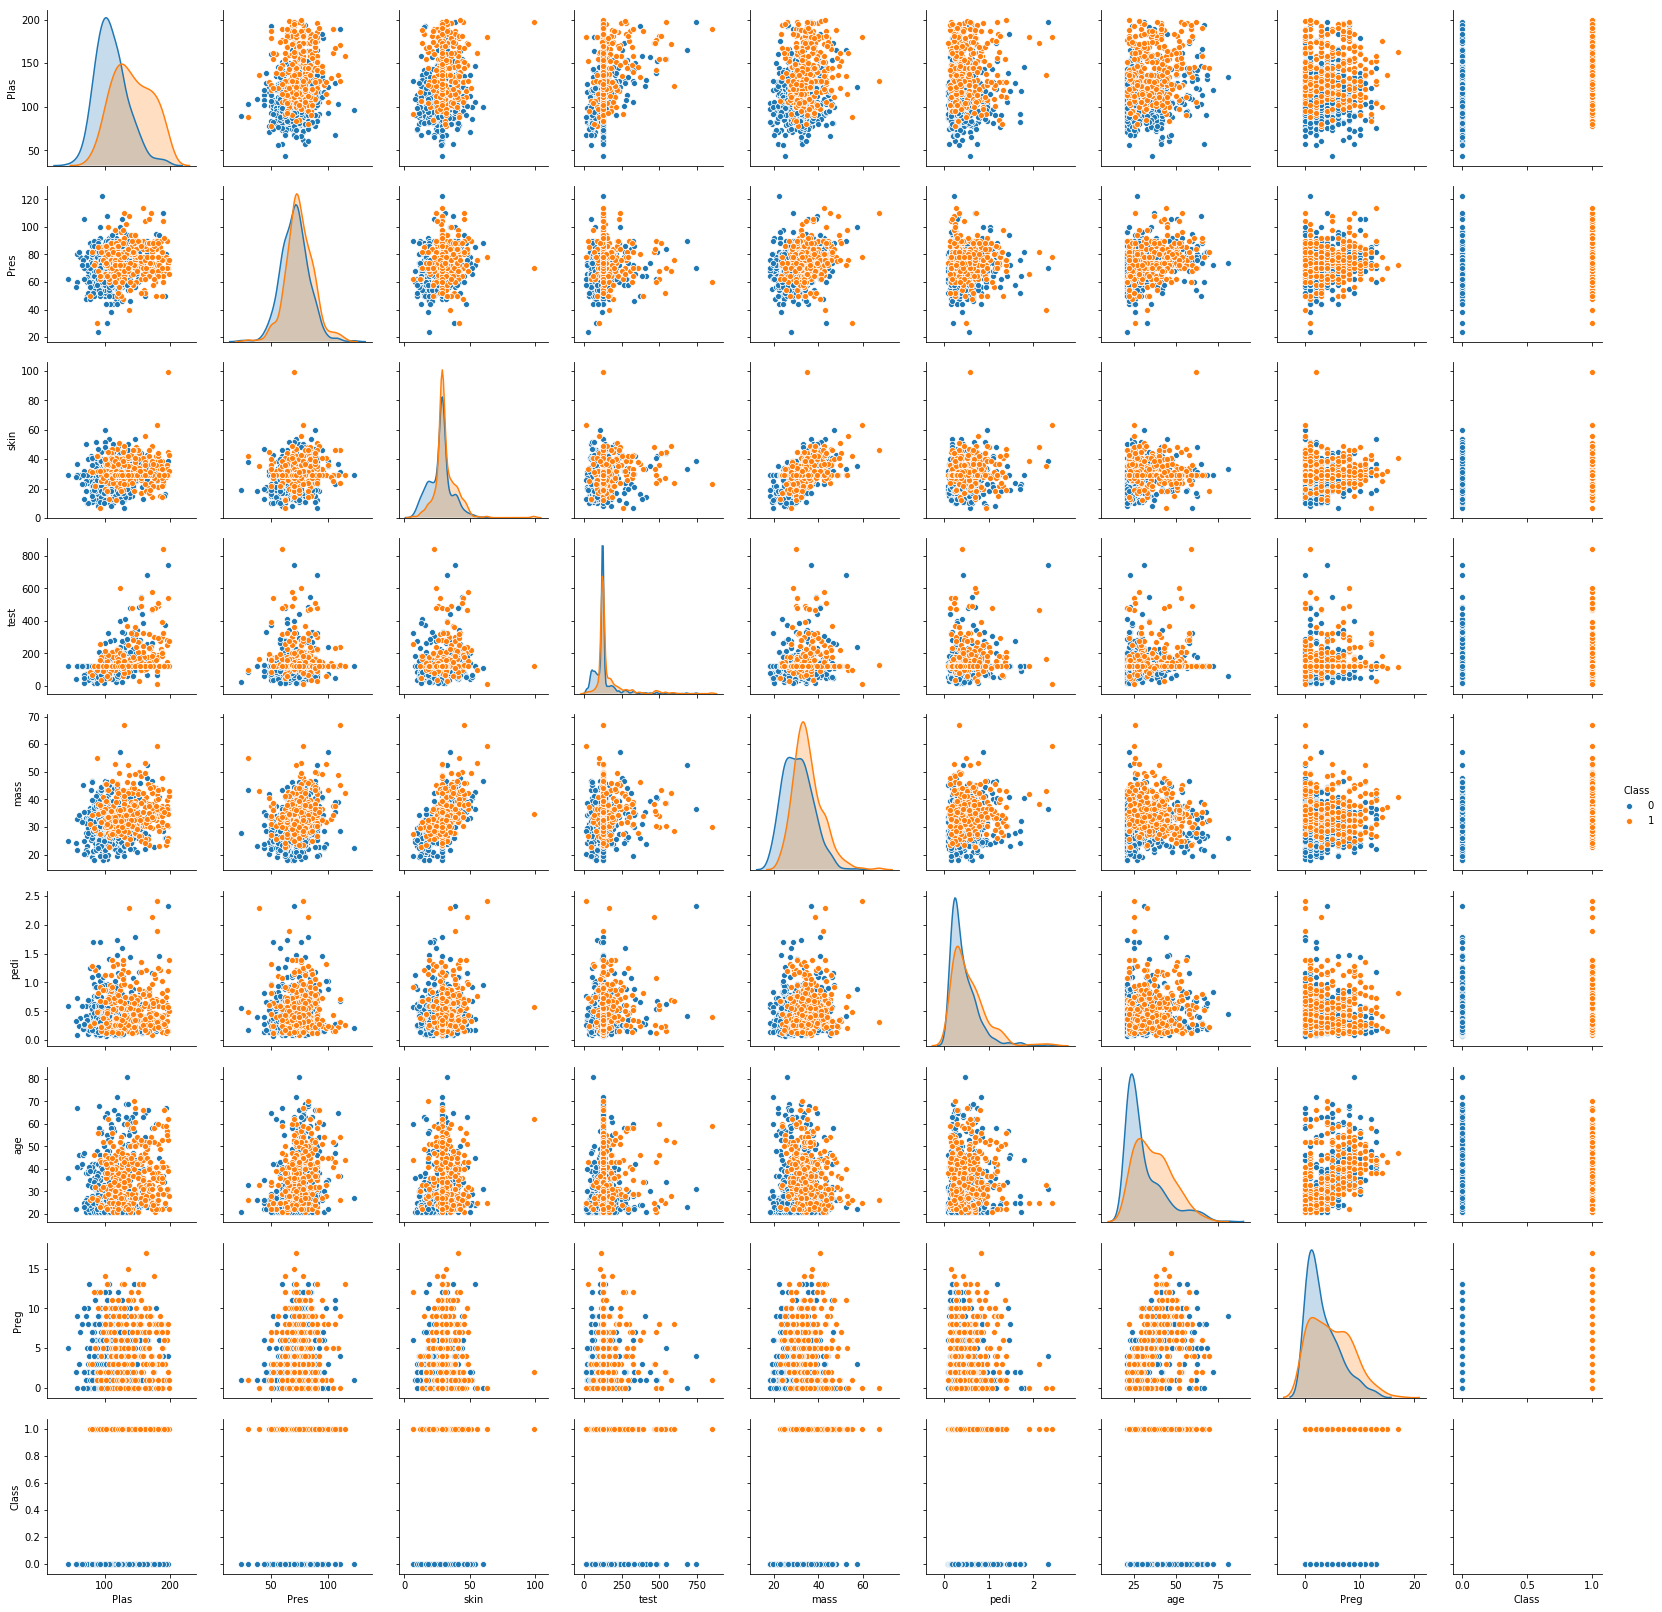

In [93]:
sns.pairplot(pima_df1, hue = 'Class')

Using the plot - infer the relationship between different variables

In [96]:
#correlation
pima_df1.corr()

,Plas,Pres,skin,test,mass,pedi,age,Preg,Class
Plas,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.128213,0.492782
Pres,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.208615,0.165723
skin,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.081770,0.214873
test,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.025047,0.203790
mass,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.021559,0.312038
pedi,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,-0.033523,0.173844
age,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.544341,0.238356
Preg,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,1.000000,0.221898
Class,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,0.221898,1.000000


# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [120]:
from sklearn.model_selection import train_test_split
# select all rows and first 8 columns which are the attributes
X = np.array(pima_df1.iloc[:,:8])
#select class into Y
Y = np.array(pima_df1.iloc[:,8])
# taking 70:30 training and test set
test_size = 0.30
# Random numbmer seeding for reapeatability of the code
seed = 7  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [150]:
from sklearn.tree import DecisionTreeClassifier                    
model = DecisionTreeClassifier(criterion = 'entropy',random_state=7 )
model.fit(X_train, y_train)
model.score(X_train, y_train)

1.0

In [154]:
y_predict = model.predict(X_test)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [157]:
#calculate accuracy measures
model.score(X_test, y_test)

0.7445887445887446

In [158]:
# calculate confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_predict))

[[116  31]
 [ 28  56]]


Print the feature importance of the decision model - Optional

In [169]:
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = pima_df1.iloc[:,:8].columns))

           Imp
Plas  0.308699
Pres  0.065074
skin  0.074021
test  0.066874
mass  0.174478
pedi  0.101014
age   0.151281
Preg  0.058558
